<a href="https://colab.research.google.com/github/ana-gleice/SAP-4/blob/main/inmetro_regr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

In [2]:
dataset = pd.read_excel('dados_inmetro2.xlsx')
dataset.head()

,Umidade 18,Umidade 72
0,9.973080,10.088885
1,11.578038,12.013763
2,8.961723,9.230330
3,15.410472,15.533139
4,12.217595,12.352443


In [3]:
x = dataset.drop('Umidade 72', axis=1)
y = dataset.drop('Umidade 18', axis=1)

In [4]:
x.head()

,Umidade 18
0,9.973080
1,11.578038
2,8.961723
3,15.410472
4,12.217595


In [5]:
dataset.head()

,Umidade 18,Umidade 72
0,9.973080,10.088885
1,11.578038,12.013763
2,8.961723,9.230330
3,15.410472,15.533139
4,12.217595,12.352443


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

**Baseline - Regressão Linear - Excel**

In [26]:
x_test_1 = x_test.values
y_excel = []
for i in x_test_1:
  n = 1.0255*i + 0.0067
  y_excel.append(list(np.around(np.array(n),2)))

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False'), 'n_jobs':range(1,10,1)}
regressor_lg = LinearRegression()

clf = GridSearchCV(regressor_lg, parameters)
clf.fit(x_train, y_train)
print(clf.best_estimator_)

model_lg = clf.best_estimator_
model_lg.fit(x_train, y_train)
y_pred_regr = model_lg.predict(x_test)

LinearRegression(copy_X='True', fit_intercept='True', n_jobs=1,
                 normalize='True')


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('mse', 'friedman_mse', 'mae', 'poisson'), 'splitter':('best', 'random'), 'min_samples_split':range(1, 5, 1)}
regressor_tree = DecisionTreeRegressor()

clf = GridSearchCV(regressor_tree, parameters)
clf.fit(x_train, y_train)
print(clf.best_estimator_)

model_tree = clf.best_estimator_
model_tree.fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10, 100, 10), 'criterion':('mse', 'mae'), 'max_features':('auto', 'sqrt', 'log2'), 'min_samples_leaf':range(1, 10, 1)}
regressor_random = RandomForestRegressor()

clf = GridSearchCV(regressor_random, parameters)
clf.fit(x_train, y_train)
print(clf.best_estimator_)

model_random = clf.best_estimator_
model_random.fit(x_train, y_train)
y_pred_random = model_random.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [31]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [17]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [32]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [33]:
erro = tf.losses.mean_squared_error(y_train, (b0 + b1 * x_train))
otimizador = tf.train.GradientDescentOptimizer(learning_rate=0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('output', sess.graph)
    for i in range(2000):
        sess.run(treinamento)
        if (i%2) == 0:
            print(sess.run(erro))
        
    b0_final, b1_final = sess.run([b0, b1])

6.272847
1.839261
0.75423706
0.48870054
0.42371505
0.4078102
0.4039168
0.40296277
0.40272832
0.40266973
0.40265432
0.4026495
0.40264732
0.40264556
0.40264413
0.40264255
0.40264112
0.4026396
0.40263826
0.40263677
0.4026354
0.40263388
0.40263233
0.402631
0.4026296
0.40262812
0.40262666
0.4026253
0.40262368
0.40262243
0.40262097
0.40261945
0.40261802
0.4026165
0.40261504
0.40261364
0.40261218
0.40261078
0.40260944
0.40260792
0.40260646
0.40260494
0.4026036
0.40260202
0.40260068
0.40259913
0.40259776
0.40259644
0.4025951
0.40259358
0.40259215
0.40259072
0.40258926
0.40258768
0.40258637
0.4025848
0.40258345
0.402582
0.4025808
0.40257928
0.4025779
0.40257633
0.402575
0.4025734
0.40257207
0.40257072
0.4025692
0.40256783
0.40256628
0.40256482
0.4025634
0.40256202
0.40256053
0.40255925
0.40255782
0.4025562
0.40255505
0.40255356
0.40255216
0.4025507
0.40254936
0.40254775
0.40254647
0.402545
0.4025436
0.4025421
0.40254065
0.40253925
0.40253785
0.4025367
0.40253502
0.4025335
0.40253213
0.40253043


In [35]:
previsoes = b0_final + b1_final * x_test
previsoes

,Umidade 18
24,13.261334
8,15.655867
3,15.861405
18,13.201573
1,12.044242
16,16.797189


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_gdo = mean_absolute_error(y_test, previsoes)

In [37]:
mae_gdo

0.12741098043606977

In [38]:
from sklearn.metrics import mean_absolute_error
mae_excel = mean_absolute_error(y_test, y_excel)
print("Erro Absoluto Médio Exccel:\n {:.2f}". format(mae_excel))
mae_regr = mean_absolute_error(y_test, y_pred_regr)
print("Erro Absoluto Médio de Regressão LinearRegression: \n {:.2f}". format(mae_regr))
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print("Erro Absoluto Médio de DecisionTreeRegressor:\n {:.2f}". format(mae_tree))
mae_rf = mean_absolute_error(y_test, y_pred_random)
print("Erro Absoluto Médio de RandomForestRegressor:\n {:.2f}". format(mae_rf))
mae_gdo = mean_absolute_error(y_test, previsoes)
print("Erro Absoluto Médio GradienteDescentOptmizer:\n {:.2f}". format(mae_gdo))

Erro Absoluto Médio Exccel:
 0.13
Erro Absoluto Médio de Regressão LinearRegression: 
 0.15
Erro Absoluto Médio de DecisionTreeRegressor:
 0.51
Erro Absoluto Médio de RandomForestRegressor:
 0.55
Erro Absoluto Médio GradienteDescentOptmizer:
 0.13


<function matplotlib.pyplot.show>

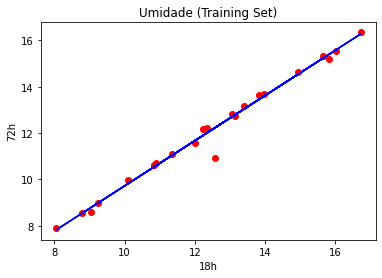

In [ ]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Umidade (Training Set)')
plt.xlabel('18h')
plt.ylabel('72h')
plt.show

In [39]:
df_results = pd.DataFrame()

In [40]:
df_results['Valor x_Excel'] = y_excel

In [42]:
df_results['Valor x_Tree'] = model_tree.predict(x_test)

In [44]:
df_results['Valor x_RandomForest'] = model_random.predict(x_test)

In [46]:
df_results['Valor x_Predict'] =  previsoes

In [47]:
df_results['72 horas'] = y_test

In [ ]:
print(y_test)

    Umidade 72
5    16.012924
24   14.750000
16   14.570000
26   11.270000
0    10.088885
1    12.013763


In [48]:
print(df_results)

  Valor x_Excel  Valor x_Tree  Valor x_RandomForest  Valor x_Predict   72 horas
0       [13.13]     13.676155             13.707811              NaN        NaN
1        [15.6]     15.295000             15.420377        12.044242  12.013763
2       [15.81]     16.012924             15.420377              NaN        NaN
3       [13.07]     13.676155             13.752721        15.861405  15.533139
4       [11.88]     12.291221             11.692095              NaN        NaN
5       [16.77]     16.012924             15.420377              NaN        NaN
